# **Project-3**

***Project Title:*** Predicting Diabetes

***Project Description:*** In this project, you will build a machine learning model to predict whether a person has diabetes or not based on their health metrics such as BMI, blood pressure, glucose levels, etc. The data set includes information on individuals' health metrics, including whether they have diabetes or not.

***Dataset Details:*** The data set contains over 750 records of female patients aged 21 years or older. The dataset has eight features (e.g., age, BMI, blood pressure, insulin level, etc.) and one target variable that indicates whether the person has diabetes or not.

Pregnancies: Number of pregnancies

Glucose: Glucose level in blood

BloodPressure: Blood pressure

SkinThickness: Thickness of the skin

Insulin: Insulin level in blood

BMI: Body Mass Index

DiabetesPedigreeFunction: Inheritance of diatbetes condition through generations

Age: Age

Outcome: 1 is Diabetic, 0 is non-Diabetic

***Datasets Location:*** Canvas -> Modules -> Week 9 -> Datasets -> **"patients.csv"**.

***Tasks:***

1) *Data Exploration and Preprocessing:* You will explore the data set, handle missing values, perform feature engineering, and preprocess the data to get it ready for model building.

2) *Model Building:* You will train and evaluate several machine learning models on the preprocessed data set.

3) *Model Evaluation:* You will evaluate the models' performance using several metrics such as accuracy, precision, recall, specificity, F1-score, and ROC curve analysis. You will also compare the models' performance and select the best-performing one.

4) *Deployment:* Once you have selected the best-performing model, you will deploy it and make predictions on new, unseen data.

This project will give you hands-on experience with supervised classification, data preprocessing, and model evaluation. It also has real-world applications in healthcare, where early detection of diabetes can help in the timely management of the disease.

Check all metrics:

- F1 score
- ROC curve
- Precision score
- Accuracy score

Use stratified sampling

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

patients = pd.read_csv("patients.csv")

"""NEED TO SITE THIS"""


# patients.describe()
missingValues = patients.isna()
missingFlag = True

for col in missingValues.columns:
    for index, valueInIndex in missingValues[col].items():
        if valueInIndex:
            print(f"Missing value at index {index} in column {col}")
            missingFlag = False
        

if missingFlag:
    print("There are no missing values in the DataFrame")

There are no missing values in the DataFrame


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#Site this I guess
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

X = patients.drop(columns=['Outcome'])
y = patients['Outcome']


for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] 


num_feat = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
            'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [3]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
#SITE THIS

def fit_and_print(myPipeline, myXTrain, myYTrain, myXTest, myYTest):
  myPipeline.fit(myXTrain, myYTrain)
  test_preds = myPipeline.predict(myXTest)

  print("Accuracy: " + str(accuracy_score(test_preds, myYTest)))
  print("Precision Score: " + str(precision_score(test_preds, myYTest)))
  print("F1 Score: " + str(f1_score(test_preds, myYTest)))
  print("Recall Score: " + str(recall_score(test_preds, myYTest)))

In [4]:
#Site this
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


def create_ROC_curve(p_y_test, probs):

    fpr, tpr, thresholds = roc_curve(p_y_test, probs)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_score(p_y_test, probs)))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


In [5]:
#Site this
from sklearn.metrics import precision_recall_curve

def create_precision_recall_curve(precision, recall, thresholds):

    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recall[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([min(thresholds), max(thresholds), 0, 1])

Logistic Regression:
Accuracy: 0.7933333333333333
Precision Score: 0.54
F1 Score: 0.6352941176470589
Recall Score: 0.7714285714285715


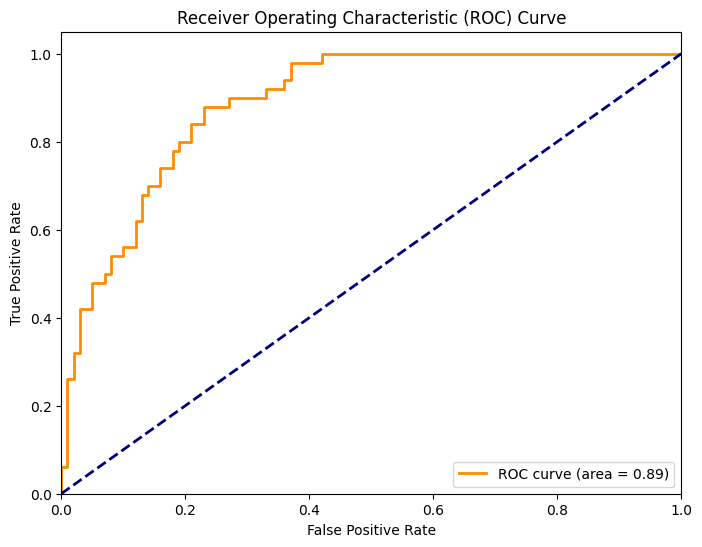

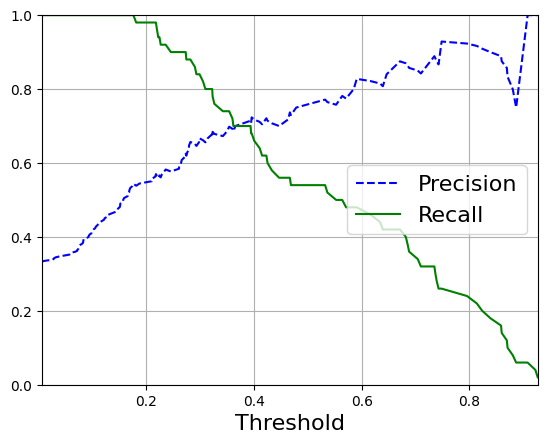

In [6]:
#A imputer was not used here due to the data set not having any null values
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

log_clf = LogisticRegression(random_state=42, solver='lbfgs')

#Site this
preprocess = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', log_clf)
])

print("Logistic Regression:")

fit_and_print(preprocess, X_train, y_train, X_test, y_test)

prob = preprocess.predict_proba(X_test)[:, 1]
create_ROC_curve(y_test, prob)

prob = preprocess.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, prob)
create_precision_recall_curve(precision, recall, thresholds)


Random Forest Classifier:
Accuracy: 0.82
Precision Score: 0.66
F1 Score: 0.7096774193548386
Recall Score: 0.7674418604651163


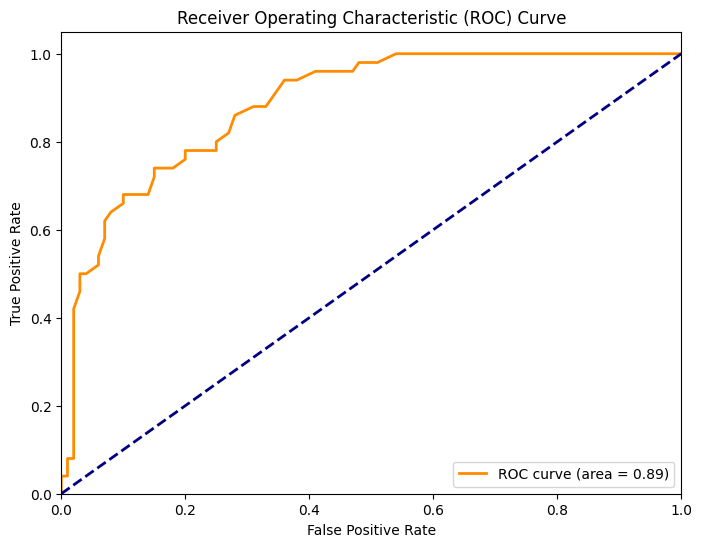

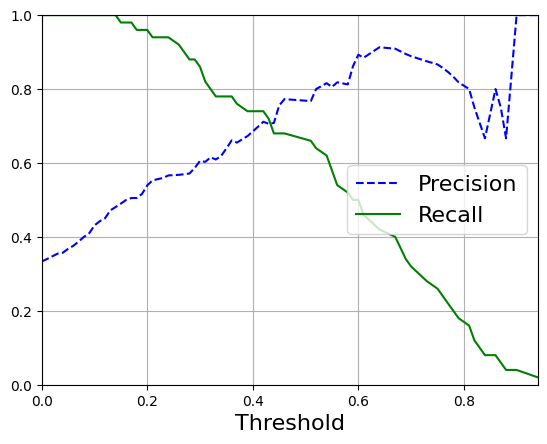

In [7]:
#Site this
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)


print("Random Forest Classifier:")
fit_and_print(rnd_clf, X_train, y_train, X_test, y_test)

prob = rnd_clf.predict_proba(X_test)[:,1]
create_ROC_curve(y_test, prob)

precision, recall, thresholds = precision_recall_curve(y_test, prob)
create_precision_recall_curve(precision, recall, thresholds)




Support Vector Classifier:
Accuracy: 0.78
Precision Score: 0.48
F1 Score: 0.5925925925925926
Recall Score: 0.7741935483870968


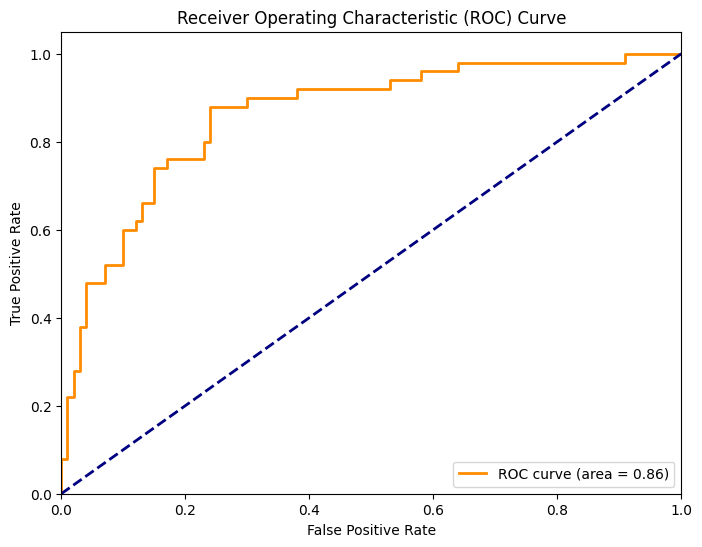

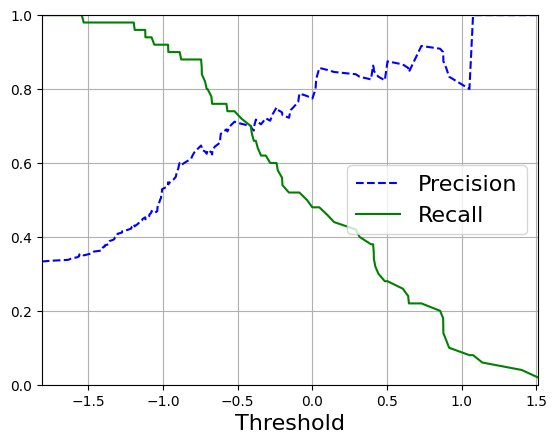

In [8]:
print("Support Vector Classifier:")

svc_clf = SVC(gamma='scale', random_state=42)

fit_and_print(svc_clf, X_train, y_train, X_test, y_test)

prob = svc_clf.decision_function(X_test)
create_ROC_curve(y_test, prob)

precision, recall, thresholds = precision_recall_curve(y_test, prob)
create_precision_recall_curve(precision, recall, thresholds)



Accuracy: 0.8066666666666666
Precision Score: 0.56
F1 Score: 0.6588235294117648
Recall Score: 0.8


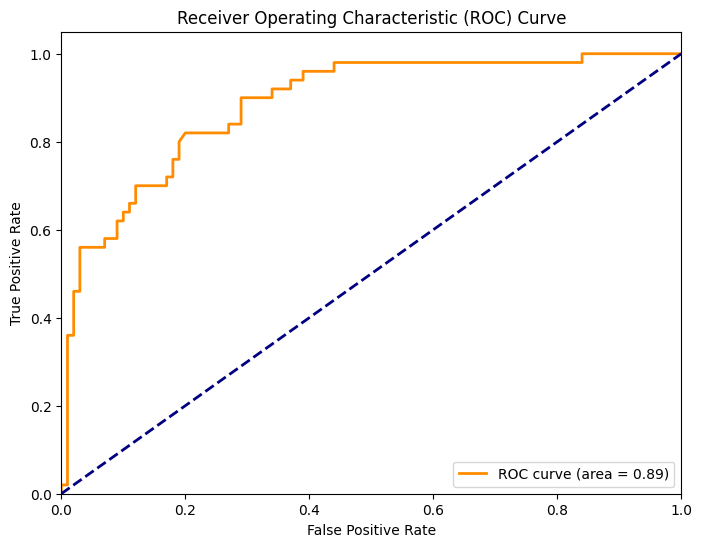

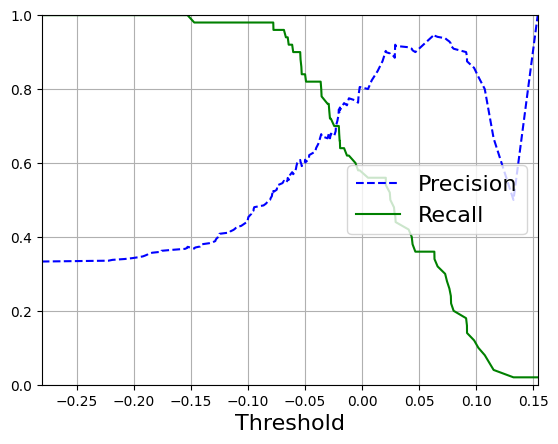

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=0.5, random_state=42
)

fit_and_print(ada_clf, X_train, y_train, X_test, y_test)

prob = ada_clf.decision_function(X_test)
create_ROC_curve(y_test, prob)

precision, recall, thresholds = precision_recall_curve(y_test, prob)
create_precision_recall_curve(precision, recall, thresholds)

In [12]:
from sklearn.model_selection import GridSearchCV

ada_clf2 = {
    'max_depth' : [1, 10, 100],
    'n_estimators' : [50, 100, 150],
    'learning_rate' : [0.2, 0.4, 0.6]

}

grid_search = GridSearchCV(AdaBoostClassifier(), ada_clf2, cv=5, n_jobs=1)

fit_and_print(grid_search, X_train, y_train, X_test, y_test)

ValueError: Invalid parameter 'max_depth' for estimator AdaBoostClassifier(learning_rate=0.2). Valid parameters are: ['algorithm', 'base_estimator', 'estimator', 'learning_rate', 'n_estimators', 'random_state'].

In [11]:
print("Hard Voting Classifier:\n")

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rnd', rnd_clf), ('svc', svc_clf), ('hard_vote', ada_clf)], 
    voting = 'hard'
)

fit_and_print(voting_clf, X_train, y_train, X_test, y_test)



Hard Voting Classifier:



C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8066666666666666
Precision Score: 0.52
F1 Score: 0.6419753086419753
Recall Score: 0.8387096774193549
